## Data Structures in `xarray`

- xarray has 2 fundamental data structures:

  - `DataArray`, which holds single multi-dimensional variables and its
    coordinates
  - `Dataset`, which holds multiple variables that potentially share the same
    coordinates

### `xarray` `DataArray`

The DataArray is xarray's implementation of a labeled, multi-dimensional array.
It has several key properties:

| Attribute | Description                                                                                                                              |
| --------- | ---------------------------------------------------------------------------------------------------------------------------------------- |
| `data`    | `numpy.ndarray` or `dask.array` holding the array's values.                                                                              |
| `dims`    | dimension names for each axis. For example:(`x`, `y`, `z`) (`lat`, `lon`, `time`).                                                       |
| `coords`  | a dict-like container of arrays (coordinates) that label each point (e.g., 1-dimensional arrays of numbers, datetime objects or strings) |
| `attrs`   | an `OrderedDict` to hold arbitrary attributes/metadata (such as units)                                                                   |
| `name`    | an arbitrary name of the array                                                                                                           |



## NumPy arrays vs xarray DataArrays

To illustrate the potential of xarray, let's first consider a simple NumPy array of size 5x5x4, corresponding to dimensions 'x','y' and 'time', filled with random values.

Our dimensions are </br>
'x': [10, 20, 30, 40, 50],</br>
'y': [10, 20, 30, 40, 50] </br>
time: First four days of 2020

Since NumPy is not aware of our dimension names, we need to remember which axes in the array correspond to which dimension names. 

In [1]:
import numpy as np
data = np.random.rand(5, 5,4)
data

array([[[0.67453183, 0.86424863, 0.65152592, 0.15976194],
        [0.83514073, 0.55678732, 0.79834714, 0.5323579 ],
        [0.57186785, 0.57608166, 0.95519273, 0.16179378],
        [0.41907643, 0.53776308, 0.89299294, 0.19750534],
        [0.50124318, 0.13129837, 0.87276769, 0.97892605]],

       [[0.96177541, 0.98091625, 0.34660051, 0.19383938],
        [0.15792853, 0.13284299, 0.17569299, 0.27493652],
        [0.11506059, 0.0121493 , 0.34278722, 0.5451238 ],
        [0.34582964, 0.39724245, 0.50941207, 0.60794805],
        [0.15871423, 0.86275569, 0.23076763, 0.86411541]],

       [[0.93641036, 0.48927792, 0.70002748, 0.69339979],
        [0.48234507, 0.72982866, 0.34099407, 0.02659844],
        [0.62968139, 0.7754521 , 0.13024834, 0.68395328],
        [0.64822664, 0.80833314, 0.49892601, 0.38485984],
        [0.51815274, 0.51275531, 0.20022006, 0.65608322]],

       [[0.508604  , 0.78114808, 0.5755162 , 0.54518052],
        [0.5664467 , 0.4191016 , 0.09189591, 0.4596039 ],
        

the equivalent in xarray is 

In [2]:
import xarray as xr
import pandas as pd
times= pd.date_range(start='1/1/2020', periods=4) 

da = xr.DataArray(data,
                  dims=['x','y','time'],
                  coords={'x': [10, 20, 30, 40, 50],
                          'y': [10, 20, 30, 40, 50],
                          'time':times},
                  attrs={"var": "random"} )
da

<xarray.DataArray (x: 5, y: 5, time: 4)>
array([[[0.67453183, 0.86424863, 0.65152592, 0.15976194],
        [0.83514073, 0.55678732, 0.79834714, 0.5323579 ],
        [0.57186785, 0.57608166, 0.95519273, 0.16179378],
        [0.41907643, 0.53776308, 0.89299294, 0.19750534],
        [0.50124318, 0.13129837, 0.87276769, 0.97892605]],

       [[0.96177541, 0.98091625, 0.34660051, 0.19383938],
        [0.15792853, 0.13284299, 0.17569299, 0.27493652],
        [0.11506059, 0.0121493 , 0.34278722, 0.5451238 ],
        [0.34582964, 0.39724245, 0.50941207, 0.60794805],
        [0.15871423, 0.86275569, 0.23076763, 0.86411541]],

       [[0.93641036, 0.48927792, 0.70002748, 0.69339979],
        [0.48234507, 0.72982866, 0.34099407, 0.02659844],
        [0.62968139, 0.7754521 , 0.13024834, 0.68395328],
        [0.64822664, 0.80833314, 0.49892601, 0.38485984],
        [0.51815274, 0.51275531, 0.20022006, 0.65608322]],

       [[0.508604  , 0.78114808, 0.5755162 , 0.54518052],
        [0.5664467 , 0.4191016 , 0.09189591, 0.4596039 ],
        [0.56043546, 0.27653838, 0.07401297, 0.41913281],
        [0.13029876, 0.97683746, 0.02695506, 0.11728459],
        [0.61881576, 0.07840119, 0.03405668, 0.77333089]],

       [[0.23901192, 0.9178672 , 0.92930577, 0.18848567],
        [0.13105913, 0.87596442, 0.47802238, 0.77209897],
        [0.5235982 , 0.75829391, 0.59141597, 0.2649169 ],
        [0.39562234, 0.84807715, 0.23199779, 0.40127423],
        [0.32652804, 0.53278558, 0.50619177, 0.11182204]]])
Coordinates:
  * x        (x) int64 10 20 30 40 50
  * y        (y) int64 10 20 30 40 50
  * time     (time) datetime64[ns] 2020-01-01 2020-01-02 2020-01-03 2020-01-04
Attributes:
    var:      random

The above information is more easily interpretable, especially when you come back to your scripts after a few months (or years!)

Now let's say we would like to determine the maximum value for each 'y' value, across all times, when 'x'=20. 

Here's one way to do that with NumPy arrays

In [3]:
data[1,:,:].max(axis=1)

array([0.98091625, 0.27493652, 0.5451238 , 0.60794805, 0.86411541])

with xarray DataArrays, we have a much nicer way of asking for the same information. Note how operations in xarray can be chained together. 

In [4]:
da.sel(x=20).max(dim='time')

<xarray.DataArray (y: 5)>
array([0.98091625, 0.27493652, 0.5451238 , 0.60794805, 0.86411541])
Coordinates:
    x        int64 20
  * y        (y) int64 10 20 30 40 50

Since our time dimension consists of `pandas.DatetimeIndex` objects that `xarray` recognizes, we can easily select with date/time

In [5]:
da.sel(time='Jan 02 2020')

<xarray.DataArray (x: 5, y: 5)>
array([[0.86424863, 0.55678732, 0.57608166, 0.53776308, 0.13129837],
       [0.98091625, 0.13284299, 0.0121493 , 0.39724245, 0.86275569],
       [0.48927792, 0.72982866, 0.7754521 , 0.80833314, 0.51275531],
       [0.78114808, 0.4191016 , 0.27653838, 0.97683746, 0.07840119],
       [0.9178672 , 0.87596442, 0.75829391, 0.84807715, 0.53278558]])
Coordinates:
  * x        (x) int64 10 20 30 40 50
  * y        (y) int64 10 20 30 40 50
    time     datetime64[ns] 2020-01-02
Attributes:
    var:      random

More features from pandas.DatetimeIndex

In [6]:
da.time.dt.dayofweek

<xarray.DataArray 'dayofweek' (time: 4)>
array([2, 3, 4, 5])
Coordinates:
  * time     (time) datetime64[ns] 2020-01-01 2020-01-02 2020-01-03 2020-01-04

In [7]:
da["time"].dt.strftime("%a, %b %d %H:%M")

<xarray.DataArray 'strftime' (time: 4)>
array(['Wed, Jan 01 00:00', 'Thu, Jan 02 00:00', 'Fri, Jan 03 00:00',
       'Sat, Jan 04 00:00'], dtype=object)
Coordinates:
  * time     (time) datetime64[ns] 2020-01-01 2020-01-02 2020-01-03 2020-01-04

### Plotting in xarray

xarray reproduces the very convenient plotting functions available in pandas, and extends it to N-d arrays

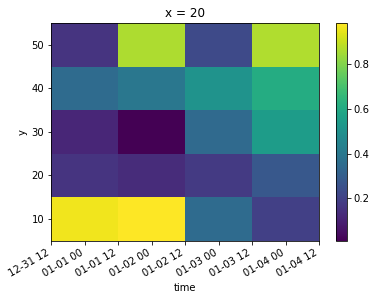

In [8]:
da.sel(x=20).plot()

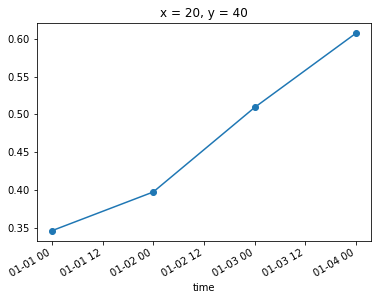

In [9]:
da.sel(x=20,y=40).plot(marker='o')

### Slicing 

The equivalent of NumPy style slicing, like data[:2,3:,2:5], in xarray is

In [10]:
da.isel(time=slice(2, 5),x=slice(None, 2), y=slice(3, None))

<xarray.DataArray (x: 2, y: 2, time: 2)>
array([[[0.89299294, 0.19750534],
        [0.87276769, 0.97892605]],

       [[0.50941207, 0.60794805],
        [0.23076763, 0.86411541]]])
Coordinates:
  * x        (x) int64 10 20
  * y        (y) int64 40 50
  * time     (time) datetime64[ns] 2020-01-03 2020-01-04
Attributes:
    var:      random

### Named dimensions `.dims`

In [11]:
da.dims

('x', 'y', 'time')

### Coordinate variables or "tick labels" (`.coords`)

`.coords` is a simple
[data container](https://xarray.pydata.org/en/stable/data-structures.html#coordinates)
for coordinate variables.

In [12]:
da.coords

Coordinates:
  * x        (x) int64 10 20 30 40 50
  * y        (y) int64 10 20 30 40 50
  * time     (time) datetime64[ns] 2020-01-01 2020-01-02 2020-01-03 2020-01-04

### Arbitrary attributes (`.attrs`)

`.attrs` is a dictionary that can contain arbitrary python objects. Your only
limitation is that some attributes may not be writeable to a netCDF file

In [13]:
da.attrs

{'var': 'random'}

### Underlying data (`.data`)

Xarray structures wrap underlying simpler data structures. In this case, the
underlying data is a numpy array which you may be familiar with. Xarray can also wrap dask arrays, sparse arrays, CuPy arrays, pint arrays. 

In [14]:
da.x.data

array([10, 20, 30, 40, 50])

### `Dataset`

- Xarray's `Dataset` is a dict-like container of labeled arrays (`DataArrays`)
  with aligned dimensions. - It is designed as an in-memory representation of a
  netCDF dataset.
- In addition to the dict-like interface of the dataset itself, which can be
  used to access any `DataArray` in a `Dataset`. Datasets have the following key
  properties:

| Attribute   | Description                                                                                                                              |
| ----------- | ---------------------------------------------------------------------------------------------------------------------------------------- |
| `data_vars` | OrderedDict of `DataArray` objects corresponding to data variables.                                                                      |
| `dims`      | dictionary mapping from dimension names to the fixed length of each dimension (e.g., {`lat`: 6, `lon`: 6, `time`: 8}).                   |
| `coords`    | a dict-like container of arrays (coordinates) that label each point (e.g., 1-dimensional arrays of numbers, datetime objects or strings) |
| `attrs`     | OrderedDict to hold arbitrary metadata pertaining to the dataset.                                                                        |


In [15]:
ds = xr.Dataset(
    data_vars={
        "a": (("x", "y","time"), np.random.rand(5, 5, 4)),
        "b": (("x", "y"), np.random.randn(5, 5)),
    },            
    coords={'x': [10, 20, 30, 40, 50],
            'y': [10, 20, 30, 40, 50],
            'time':times},
    attrs={"dataset": "test dataset"} )
ds

<xarray.Dataset>
Dimensions:  (time: 4, x: 5, y: 5)
Coordinates:
  * x        (x) int64 10 20 30 40 50
  * y        (y) int64 10 20 30 40 50
  * time     (time) datetime64[ns] 2020-01-01 2020-01-02 2020-01-03 2020-01-04
Data variables:
    a        (x, y, time) float64 0.2189 0.6942 0.3802 ... 0.1284 0.1168 0.6395
    b        (x, y) float64 1.706 0.9909 -0.05012 ... -1.078 0.04006 0.001411
Attributes:
    dataset:  test dataset

Since a Dataset is a dict-like container of DataArrays, we can access variables in a dataset like

In [16]:
ds['a']

<xarray.DataArray 'a' (x: 5, y: 5, time: 4)>
array([[[0.21887146, 0.69417084, 0.38019682, 0.7968986 ],
        [0.88923141, 0.35822013, 0.33873899, 0.93639349],
        [0.06338672, 0.32400065, 0.15748565, 0.72614156],
        [0.12962325, 0.80546285, 0.69694276, 0.38982539],
        [0.44058186, 0.82143856, 0.54107189, 0.50832818]],

       [[0.34251003, 0.11809382, 0.36720212, 0.46747032],
        [0.22072514, 0.96717046, 0.50099827, 0.91677387],
        [0.28046949, 0.62332177, 0.69462398, 0.35024908],
        [0.77557913, 0.50844983, 0.25625599, 0.59028651],
        [0.4131531 , 0.6739028 , 0.75462989, 0.99850914]],

       [[0.55295775, 0.79539055, 0.75234053, 0.50750454],
        [0.06831536, 0.80372564, 0.13248229, 0.56374316],
        [0.69048645, 0.17150972, 0.74281362, 0.91952021],
        [0.55817355, 0.57353339, 0.50213986, 0.70910384],
        [0.27559319, 0.80865201, 0.34531252, 0.9496694 ]],

       [[0.72608525, 0.46434202, 0.60700741, 0.81659523],
        [0.73089187, 0.63863841, 0.49145835, 0.64066519],
        [0.24641435, 0.53611793, 0.85082068, 0.65170825],
        [0.94400025, 0.41039777, 0.12846642, 0.49771713],
        [0.52687594, 0.38805228, 0.50190581, 0.6476622 ]],

       [[0.61215721, 0.01359816, 0.76094687, 0.0510972 ],
        [0.01594488, 0.93531941, 0.4556439 , 0.2774367 ],
        [0.17702974, 0.31364831, 0.16431731, 0.39086358],
        [0.61405902, 0.831893  , 0.28059148, 0.45669532],
        [0.27955489, 0.12844361, 0.11680648, 0.63952296]]])
Coordinates:
  * x        (x) int64 10 20 30 40 50
  * y        (y) int64 10 20 30 40 50
  * time     (time) datetime64[ns] 2020-01-01 2020-01-02 2020-01-03 2020-01-04

You can save some typing by using the "attribute" or "dot" notation. This won't
work for variable names that clash with a built-in method name (like `mean` for
example).

In [17]:
ds.y  ## same as ds["y"]

<xarray.DataArray 'y' (y: 5)>
array([10, 20, 30, 40, 50])
Coordinates:
  * y        (y) int64 10 20 30 40 50

### I/O

One of Xarray's most widely used features is its ability to read from and write
to a variety of data formats. For example, Xarray can read the following
formats:

- [NetCDF](https://www.unidata.ucar.edu/software/netcdf/) / GRIB (via
  `open_dataset` / `open_mfdataset`, `to_netcdf` / `save_mfdataset`)
- [Zarr](https://zarr.readthedocs.io/en/stable/) (via `open_zarr`, `to_zarr`)
- [GeoTIFF](https://gdal.org/drivers/raster/gtiff.html) /
  [GDAL rasters](https://svn.osgeo.org/gdal/tags/gdal_1_2_5/frmts/formats_list.html)
  (via `open_rasterio`)

#### NetCDF

The recommended way to store xarray data structures is NetCDF, which is a binary
file format for self-described datasets that originated in the geosciences.
Xarray is based on the netCDF data model, so netCDF files on disk directly
correspond to Dataset objects.

Xarray reads and writes to NetCDF files using the `open_dataset` /
`open_dataarray` functions and the `to_netcdf` method.

Let's first create some datasets and write them to disk using `to_netcdf`, which
takes the path we want to write to:

In [6]:
# write datasets
ds.to_netcdf("ds.nc")

To open the netcdf file we just created as an xarray Dataset, we can do 

In [8]:
ds1 = xr.open_dataset("ds.nc")
ds1

<xarray.Dataset>
Dimensions:  (time: 4, x: 5, y: 5)
Coordinates:
  * x        (x) int64 10 20 30 40 50
  * y        (y) int64 10 20 30 40 50
  * time     (time) datetime64[ns] 2020-01-01 2020-01-02 2020-01-03 2020-01-04
Data variables:
    a        (x, y, time) float64 ...
    b        (x, y) float64 ...
Attributes:
    dataset:  test dataset

</br>

### Exercise

Create an xarray `Dataset` with the following

1. variables
    - "height" with dimensions "latitude" and "longitude", initialized with random data
    - "temperature" with dims "time", "latitude" and "longitude". initialized with random data

2. dimensions
    - "latitude": -90 to 90 with step size 1
    - "longitude": -180 to 180, with 50 points spaced equally between the intervals
    - "time": the first ten days of May, 2021

3. attribute
    - insitution: TAMU

The dimensions are already created for you, but notice the functions used to create them. Optionally, you can save this as a netCDF file. 

In [30]:
latitude = np.arange(-90, 91, 1)
longitude =  np.linspace(-180, 180, 50)
time = pd.date_range(start='5/1/2021', periods=10, freq='D')

temp_data = ## Your code here
height_data = ## Your code here


ds = xr.Dataset(
    data_vars={
     ## Your code here
     ##   
    },            
    coords={
     ## Your code here
     ##   
    },
    attrs={
    ## Your code here
    ##   
    } )
ds

In [35]:
latitude = np.arange(-90, 91, 1)
longitude =  np.linspace(-180, 180, 50)
time = pd.date_range(start='5/1/2021', periods=10, freq='D')



temp_data = np.random.rand(latitude.size, longitude.size, time.size)
height_data = np.random.rand(latitude.size, longitude.size)


ds = xr.Dataset(
    data_vars={
        "temperature": (("latitude", "longitude","time"), temp_data),
        "height": (("latitude", "longitude"), height_data),
    },            
    coords={'latitude': latitude,
            'longitude': longitude,
            'time':time },
    attrs={"insitution": "TAMU"} )
ds

<xarray.Dataset>
Dimensions:      (latitude: 181, longitude: 50, time: 10)
Coordinates:
  * latitude     (latitude) int64 -90 -89 -88 -87 -86 -85 ... 85 86 87 88 89 90
  * longitude    (longitude) float64 -180.0 -172.7 -165.3 ... 165.3 172.7 180.0
  * time         (time) datetime64[ns] 2021-05-01 2021-05-02 ... 2021-05-10
Data variables:
    temperature  (latitude, longitude, time) float64 0.8721 0.2908 ... 0.2222
    height       (latitude, longitude) float64 0.1949 0.5129 ... 0.3082 0.4463
Attributes:
    insitution:  TAMU